In [1]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [32]:
n_dim = 2
dim_centers = [[1,1], [-1,-1], [1,-1], [-1,1]]
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
                             centers=dim_centers, cluster_std=0.3,
                             shuffle=True)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,
                           centers=dim_centers, cluster_std=0.3,
                           shuffle=True)

In [33]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape )

(80, 2) (80,)
(20, 2) (20,)


In [13]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y == f] = to_
    return y

In [34]:
y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

In [35]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

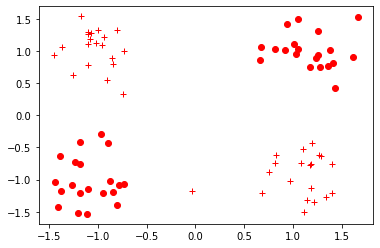

In [36]:
plt.figure()
vis_data(x_train, y_train)
plt.show()

In [38]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [39]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, input_tensor):
        linear_1 = self.linear_1(input_tensor)
        relu = self.relu(linear_1)
        linear_2 = self.linear_2(relu)
        output = self.sigmoid(linear_2)
        return output


In [42]:
model = NeuralNet(2,5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000

In [45]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [46]:
model.eval()

NeuralNet(
  (linear_1): Linear(in_features=2, out_features=5, bias=True)
  (relu): ReLU()
  (linear_2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [49]:
test_loss_before = criterion(model(x_test).squeeze(), y_test)

In [52]:
print(f'Before training : {test_loss_before.item()}')

Before training : 0.7488294839859009


In [54]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    
    if epoch % 100 == 0:
        print(f'Train loss is {train_loss.item()}')
    train_loss.backward()
    optimizer.step()

Train loss is 0.7488402128219604
Train loss is 0.6631518006324768
Train loss is 0.593135416507721
Train loss is 0.513570249080658
Train loss is 0.4343748986721039
Train loss is 0.34906893968582153
Train loss is 0.26340535283088684
Train loss is 0.19427315890789032
Train loss is 0.14594323933124542
Train loss is 0.11391369998455048
Train loss is 0.09242110699415207
Train loss is 0.077506884932518
Train loss is 0.06661520898342133
Train loss is 0.05834522843360901
Train loss is 0.05190085247159004
Train loss is 0.04671218618750572
Train loss is 0.042440563440322876
Train loss is 0.03886837512254715
Train loss is 0.03583323210477829
Train loss is 0.033221058547496796


In [57]:
model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test)
print(f'After training:{test_loss.item()}')

After training:0.07589904963970184


In [58]:
torch.save(model.state_dict(), './basic-ann-model.pt')
print(f'state_dic format of the model : {model.state_dict()}')

state_dic format of the model : OrderedDict([('linear_1.weight', tensor([[-1.3680e+00, -1.5766e+00],
        [ 1.7756e+00,  1.6328e+00],
        [-2.6857e-05,  9.5380e-01],
        [ 1.2915e+00, -1.4224e+00],
        [ 8.5178e-01,  7.2519e-01]])), ('linear_1.bias', tensor([-0.0858, -0.2990,  1.3308,  0.0669, -0.0650])), ('linear_2.weight', tensor([[-1.9652, -2.2620,  1.3688,  1.8820, -0.9913]])), ('linear_2.bias', tensor([0.6590]))])


In [60]:
new_model = NeuralNet(2,5)

In [61]:
new_model.load_state_dict(torch.load('./basic-ann-model.pt'))

<All keys matched successfully>

In [62]:
new_model.eval()

NeuralNet(
  (linear_1): Linear(in_features=2, out_features=5, bias=True)
  (relu): ReLU()
  (linear_2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [64]:
print(f'벡터 [-1,1]이 레이블 1을 가질 확률은 {new_model(torch.FloatTensor([-1,1])).item()}')

벡터 [-1,1]이 레이블 1을 가질 확률은 0.9778240919113159
